## Plot seasonal varition ampltitude versus day of year for different energy bins

In [14]:
from csmodification_analyzer import SensitivityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
from utils.helpers import *
from MCEq.core import MCEqRun
import crflux.models as pm

In [13]:
def get_sv_amplitude(flux, energy, ebins, angles_edges, doys):
    masks = []
    flux_year = np.mean(flux, axis=1)

    sv_amplitude = np.ndarray(shape=(len(angles_edges) - 1, len(ebins)-1, len(doys)), dtype=float)  
    
    for j in range(len(angles_edges) - 1):
        for i in range(len(ebins) - 1):
            mask = (energy >= ebins[i]) & (energy < ebins[i + 1])
            masks.append(mask)
            sv_amplitude[j][i] = np.sum(flux[j, :, mask], axis=0) / np.sum(flux_year[j, mask])  

    return   sv_amplitude

In [2]:
path = '/data/user/khymon/cs-analysis/promptscaling/'

In [37]:
flux_pr50 = np.load(path + 'numu_1.5prompt_SIBYLL2.3c_mceqflux.npy')
flux_pr100 = np.load(path + 'numu_2.0prompt_SIBYLL2.3c_mceqflux.npy')
flux_def = np.load('/data/user/khymon/cs-analysis/numu_1.0pion_1.0kaon_10000.0_const_SIBYLL2.3c_mceqflux.npy')

In [5]:
flux_pr50.shape 

(2, 73, 121)

In [38]:
doy = doys(5)
mceq = MCEqRun(
            interaction_model="SIBYLL2.3c",
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
    )

energy = mceq.e_grid

edges  = ebins()

angles_edges = angular_bins('numu', 2)

sv_def = get_sv_amplitude(flux_def, energy, edges, [90.,100.], doy)
sv_pr50 = get_sv_amplitude(flux_pr50, energy, edges, [90.,100.], doy)
sv_pr100 = get_sv_amplitude(flux_pr100, energy, edges, [90.,100.], doy)

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


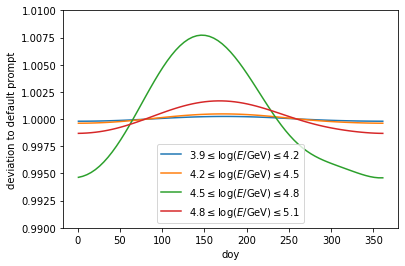

In [41]:
plt.tight_layout()
plt.plot(doy,sv_pr50[0,6]/sv_def[0,6],label=str(np.log10(edges[6])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[7])))
plt.plot(doy,sv_pr50[0,7]/sv_def[0,7],label=str(np.log10(edges[7])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[8])))
plt.plot(doy,sv_pr50[0,7]/sv_def[0,8],label=str(np.log10(edges[8])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[9])))
plt.plot(doy,sv_pr50[0,9]/sv_def[0,9],label=str(np.log10(edges[9])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[10])))
plt.ylim(0.99,1.01)
plt.xlabel('doy')
plt.ylabel('deviation to default prompt')
plt.legend(frameon='False')
plt.savefig('/home/khymon/Plots/cs-analysis/sibyll_numu_prompx1.5.png')

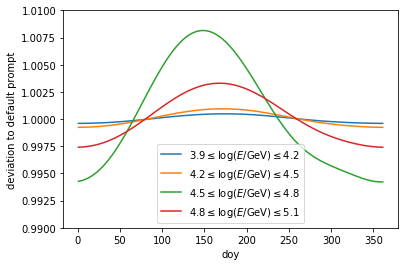

In [42]:
plt.tight_layout()
plt.plot(doy,sv_pr100[0,6]/sv_def[0,6],label=str(np.log10(edges[6])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[7])))
plt.plot(doy,sv_pr100[0,7]/sv_def[0,7],label=str(np.log10(edges[7])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[8])))
plt.plot(doy,sv_pr100[0,7]/sv_def[0,8],label=str(np.log10(edges[8])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[9])))
plt.plot(doy,sv_pr100[0,9]/sv_def[0,9],label=str(np.log10(edges[9])) + '$\leq \log (E/$GeV$) \leq $' + str(np.log10(edges[10])))
plt.ylim(0.99,1.01)
plt.xlabel('doy')
plt.ylabel('deviation to default prompt')
plt.legend(frameon='False')
plt.savefig('/home/khymon/Plots/cs-analysis/sibyll_numu_prompx2.png')